Principal Component Analysis (PCA) is a fundamental dimensionality reduction technique widely used in statistics and machine learning. Given a dataset with potentially correlated features, PCA transforms the data into a new coordinate system such that the greatest variance by any projection of the data lies on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. This helps in reducing the number of variables while retaining most of the information present in the dataset.

Mathematically, consider a data matrix $X \in \mathbb{R}^{n \times d}$, where $n$ is the number of samples and $d$ the number of features. PCA proceeds as follows:

1. **Center the data:** Subtract the mean of each feature: $\tilde{X} = X - \mu$, where $\mu$ is the vector of feature means.
2. **Compute the covariance matrix:** $C = \frac{1}{n-1}\tilde{X}^T\tilde{X}$.
3. **Eigen decomposition:** Find the eigenvalues and eigenvectors of $C$. The eigenvectors (principal components) determine the directions of maximum variance, while the eigenvalues quantify the variance in those directions.
4. **Project the data:** To reduce the dimensionality from $d$ to $k$ (where $k < d$), select the top $k$ eigenvectors (those with the largest eigenvalues) and project the centered data onto this $k$-dimensional subspace.

Formally, if $W_k$ is the $d \times k$ matrix containing the $k$ eigenvectors as columns, the dimension-reduced data is $Z = \tilde{X} W_k$.

PCA is intimately tied to the singular value decomposition (SVD) of the data matrix and provides the best low-rank approximation of the data in the least squares sense. Since PCA seeks directions with maximal variance, it is sensitive to the scaling of variables, meaning features with larger variance can dominate the principal components unless the dataset is standardized.

PCA is commonly used for data visualization, noise reduction, and as a preprocessing step for downstream machine learning algorithms.


/tmp/ipykernel_44859/1272707669.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, size=300)


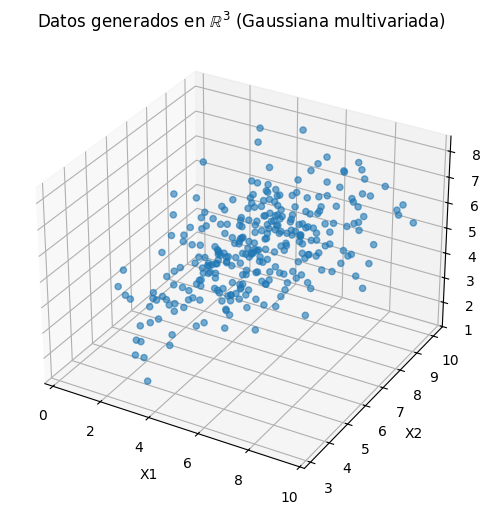

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Generar datos en R^3 siguiendo una distribución gaussiana multivariada
np.random.seed(0)
mean = [5, 7, 5]
cov = [[3, 1, 1],
       [1, 2, 1.5],
       [1, 0.5, 1]]  # matriz de covarianza no diagonal, datos correlacionados
X = np.random.multivariate_normal(mean, cov, size=300)

# Graficar los datos en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.6)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Datos generados en $\\mathbb{R}^3$ (Gaussiana multivariada)')
plt.show()


In [3]:
X.shape

(300, 3)

In [4]:
# Compute SVD of X
U, S, VT = np.linalg.svd(X-X.mean(axis=0), full_matrices=False)



In [5]:
U.shape, S.shape, VT.shape

((300, 3), (3,), (3, 3))

In [6]:
# Implementación "manual" de PCA para X (usando solo numpy)
# 1. Centrar los datos
X_centered = X - X.mean(axis=0)

# 2. Calcular la matriz de covarianza
cov_matrix = np.cov(X_centered, rowvar=False)

# 3. Calcular autovalores y autovectores de la matriz de covarianza
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# 4. Ordenar los componentes principales por varianza (autovalores)
idx = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[idx]
eigvecs_sorted = eigvecs[:, idx]

# 5. Proyectar los datos sobre los componentes principales
X_pca = X_centered @ eigvecs_sorted

# Las variables relevantes ahora son:
# - eigvecs_sorted: componentes principales (direcciones)
# - eigvals_sorted: varianzas explicadas
# - X_pca: datos proyectados

# Mostrar resultados breves
eigvals_sorted, eigvecs_sorted, X_pca[:5]  # Primeras 5 filas proyectadas


(array([4.31453262, 1.57655883, 0.37293415]),
 array([[-0.79332379, -0.60487903, -0.06898343],
        [-0.4460011 ,  0.65456553, -0.6104318 ],
        [-0.41439157,  0.45350338,  0.78905913]]),
 array([[ 3.58684715, -0.83613129,  0.68794788],
        [ 4.41034485, -2.76351099, -0.53511664],
        [ 1.95479738, -0.05283019, -0.01366928],
        [ 0.83718443, -0.30272033,  1.02556762],
        [ 1.54766897, -0.3498604 ,  0.35837731]]))

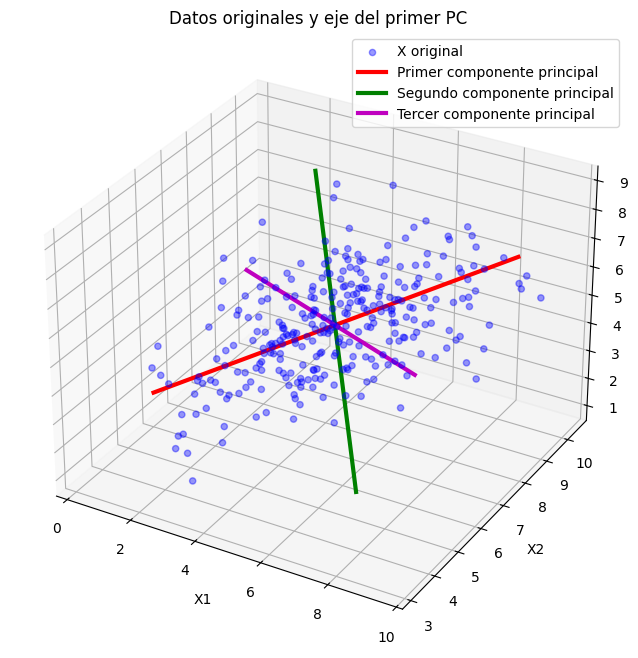

In [7]:


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos originales
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color='b', alpha=0.4, label='X original')

# Dibujar líneas en la dirección de los tres primeros componentes principales
origin = X.mean(axis=0)  # origen en el centroide
t = np.linspace(-5, 5, 50)  # escala arbitraria para visualizar
colors = ['r', 'g', 'm']
labels = [
    'Primer componente principal',
    'Segundo componente principal',
    'Tercer componente principal'
]

for i in range(3):
    pc_vec = eigvecs_sorted[:, i]
    line = origin + np.outer(t, pc_vec)
    ax.plot(line[:, 0], line[:, 1], line[:, 2], color=colors[i], lw=3, label=labels[i])

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Datos originales y eje del primer PC')
ax.legend()
plt.show()


Primeras 5 filas de X proyectadas a 2D:
[[ 3.58684715 -0.83613129]
 [ 4.41034485 -2.76351099]
 [ 1.95479738 -0.05283019]
 [ 0.83718443 -0.30272033]
 [ 1.54766897 -0.3498604 ]]

Eigenvectores (componentes principales usados para 2D):
[[-0.79332379 -0.60487903]
 [-0.4460011   0.65456553]
 [-0.41439157  0.45350338]]


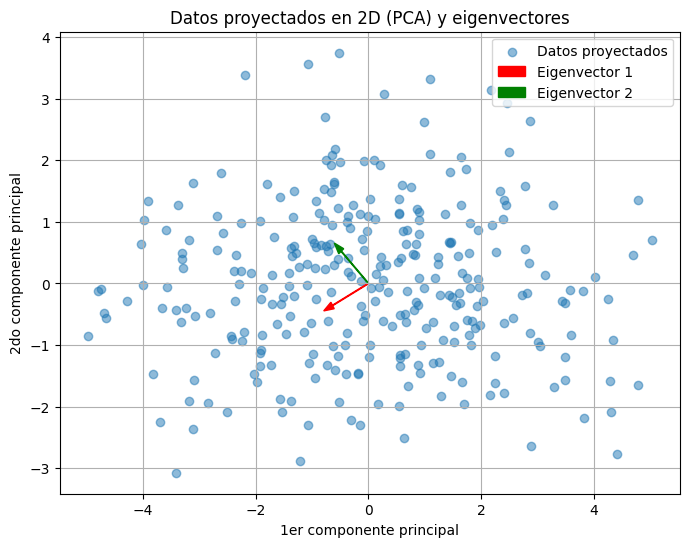

In [8]:
# Proyectar X en 2 dimensiones usando los dos primeros componentes principales
X_pca_2d = X_centered @ eigvecs_sorted[:, :2]
eigenvectors_2d = eigvecs_sorted[:, :2]

# Mostrar las primeras 5 filas proyectadas a 2D
print('Primeras 5 filas de X proyectadas a 2D:')
print(X_pca_2d[:5])

# Mostrar los eigenvectores correspondientes
print('\nEigenvectores (componentes principales usados para 2D):')
print(eigenvectors_2d)

# Opcional: graficar los datos proyectados en 2D
plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5, label='Datos proyectados')

# Dibujar los eigenvectores en el gráfico
origin = np.zeros(2)
for i in range(2):
    vec = eigenvectors_2d[:, i]
    plt.arrow(origin[0], origin[1], vec[0], vec[1], 
              color=['red', 'green'][i], 
              width=0.01, head_width=0.12, 
              length_includes_head=True,
              label=f'Eigenvector {i+1}')

plt.xlabel('1er componente principal')
plt.ylabel('2do componente principal')
plt.title('Datos proyectados en 2D (PCA) y eigenvectores')
plt.legend()
plt.grid(True)
plt.show()


 Probabilistic Principal Component Analysis (PPCA)

 Probabilistic PCA (PPCA), introduced by Tipping & Bishop (1999), is a probabilistic model for principal component analysis.

 ## Mathematical formulation

 PPCA models the observed D-dimensional data vector x as a linear transformation of an M-dimensional latent variable z plus isotropic Gaussian noise:

 $$ 
 x = W z + \mu + \epsilon 
 $$
 
 where
 - $z \sim \mathcal{N}(0, I_M)$ is the latent variable (with $M < D$)
 - $W$ is a $D \times M$ weight (loading) matrix
 - $\mu$ is the data mean (a D-dimensional vector)
 - $\epsilon \sim \mathcal{N}(0, \sigma^2 I_D)$ is Gaussian noise with isotropic covariance

 Therefore, marginally,
 $$
 x \sim \mathcal{N}(\mu, C), \qquad C = W W^T + \sigma^2 I_D
 $$

 Given data $X = [x_1, \ldots, x_N]^T$, the goal is to estimate the parameters $W$ and $\sigma^2$.

 ## Expectation-Maximization (EM) Algorithm for PPCA

 The EM algorithm is an iterative approach for parameter estimation in models with latent variables.

 **Initialization:** Initialize $W$ and $\sigma^2$ (e.g., randomly).

 **E-step:** For each data point $x_n$, compute the posterior expectation and second moment of the latent variable $z_n$:
 $$
 \begin{align*}
 M &= W^T W + \sigma^2 I_M \\
 \langle z_n \rangle &= M^{-1} W^T (x_n - \mu) \\
 \langle z_n z_n^T \rangle &= \sigma^2 M^{-1} + \langle z_n \rangle \langle z_n \rangle^T
 \end{align*}
 $$

 **M-step:** Update the parameters $W$ and $\sigma^2$ using the expectations:
 $$
 W_{\text{new}} = \left( \sum_{n=1}^N (x_n - \mu) \langle z_n \rangle^T \right) \left( \sum_{n=1}^N \langle z_n z_n^T \rangle \right)^{-1}


 \sigma_{\text{new}}^2 = \frac{1}{N D} \sum_{n=1}^N \left\{ \| x_n - \mu \|^2 - 2 \langle z_n \rangle^T W_{\text{new}}^T (x_n - \mu) + \text{Tr}\left( \langle z_n z_n^T \rangle W_{\text{new}}^T W_{\text{new}} \right)\right\}
 $$

 **Convergence:** Repeat E-step and M-step until convergence (parameters change less than a chosen tolerance).
Probabilistic Principal Component Analysis (PPCA)

Probabilistic PCA (PPCA), introduced by Tipping & Bishop (1999), is a probabilistic framework for principal component analysis. It allows one to model observed high-dimensional data as being generated from a lower-dimensional latent variable space plus Gaussian noise.

## Mathematical Formulation

PPCA models each observed D-dimensional data vector x as:

$$
x = W z + \mu + \epsilon
$$

where:

- $z \sim \mathcal{N}(0, I_M)$ is an $M$-dimensional latent variable ($M < D$)
- $W$ is a $D \times M$ loading (weight) matrix
- $\mu$ is the mean of the data (a D-dimensional vector)
- $\epsilon \sim \mathcal{N}(0, \sigma^2 I_D)$ is isotropic Gaussian noise

The marginal distribution over observed data is also Gaussian:

$$
x \sim \mathcal{N}(\mu, C), \qquad C = W W^T + \sigma^2 I_D
$$

Given a dataset $X = [x_1, \ldots, x_N]^T$, our goal is to find the parameters $W$ and $\sigma^2$ that best explain the observed data under this model.

## Expectation-Maximization (EM) Algorithm for PPCA

The EM algorithm is used to estimate the parameters when there are latent (unobserved) variables, like $z$, in the model.

**Initialization:** Initialize $W$ and $\sigma^2$ (for example, randomly).

**E-step:** For each data point $x_n$, compute the posterior expectation and second moment of the latent variable $z_n$:

$$
\begin{align*}
M &= W^T W + \sigma^2 I_M \\\\
\langle z_n \rangle &= M^{-1} W^T (x_n - \mu) \\\\
\langle z_n z_n^T \rangle &= \sigma^2 M^{-1} + \langle z_n \rangle \langle z_n \rangle^T
\end{align*}
$$

**M-step:** Update the parameters $W$ and $\sigma^2$ using the expectations found in the E-step:

$$
W_{\text{new}} = \left( \sum_{n=1}^N (x_n - \mu) \langle z_n \rangle^T \right) \left( \sum_{n=1}^N \langle z_n z_n^T \rangle \right)^{-1}
$$

$$
\sigma_{\text{new}}^2 = \frac{1}{N D} \sum_{n=1}^N \left[ \| x_n - \mu \|^2 - 2 \langle z_n \rangle^T W_{\text{new}}^T (x_n - \mu) + \mathrm{Tr}\left( \langle z_n z_n^T \rangle W_{\text{new}}^T W_{\text{new}} \right) \right]
$$

**Convergence:** Iterate E and M steps until convergence, e.g., until the change in parameters is less than a specified tolerance.

Primeras 5 filas proyectadas a 2D (Probabilistic PCA):
[[-1.41381651  2.47034543]
 [-4.39055082  3.94406241]
 [-0.15485754  1.1358699 ]
 [-0.49437456  0.63277832]
 [-0.59335561  1.06021274]]
Primeras 5 filas de datos generados (PPCA):
[[7.75075307 8.09924921 5.98014223]
 [3.65933489 6.52280368 4.40313633]
 [4.63121118 7.70654897 5.40382033]
 [3.95033787 6.72440299 4.58418734]
 [5.16128994 7.64061354 5.39903432]]
Distancia euclidiana entre los centroides de los grupos (proyectados vs generados): 8.7182
Distancia de Wasserstein (eje 0): 4.9782
Distancia de Wasserstein (eje 1): 7.1570


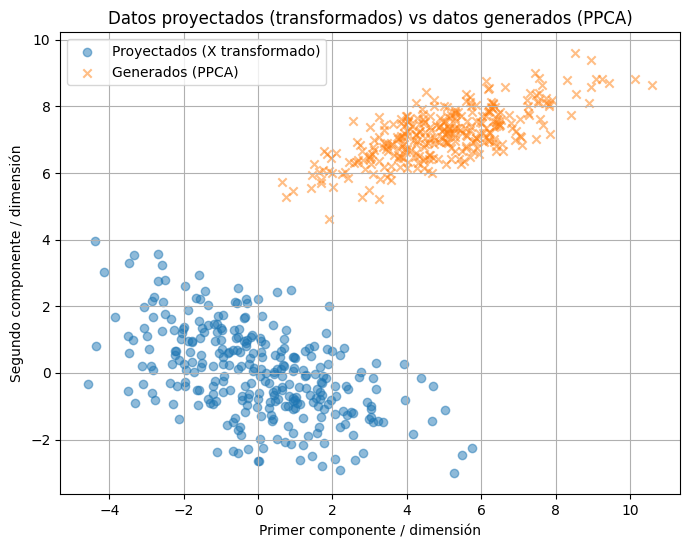

In [12]:
import numpy as np

class ProbabilisticPCA:
    def __init__(self, n_components, tol=1e-4, max_iter=200):
        self.n_components = n_components
        self.tol = tol
        self.max_iter = max_iter
        self.W = None
        self.sigma2 = None
        self.mean_ = None

    def fit(self, X):
        # Centrar los datos
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_

        N, D = X_centered.shape
        M = self.n_components

        # Inicialización de W y sigma2
        W = np.random.randn(D, M)
        sigma2 = np.random.rand() + 1e-2

        ll_old = -np.inf
        I_M = np.eye(M)

        for it in range(self.max_iter):
            # E-step: calcular la expectativa del espacio latente
            M_inv = np.linalg.inv(W.T @ W + sigma2 * I_M)
            Ez = (M_inv @ W.T @ X_centered.T).T  # (N x M)
            Ezz = sigma2 * M_inv + Ez[:, :, None] * Ez[:, None, :]  # (N x M x M)
            
            # M-step: actualizar W y sigma2
            sum_Ezz = np.sum(Ezz, axis=0)
            W_new = (X_centered.T @ Ez) @ np.linalg.inv(sum_Ezz)
            X_est = Ez @ W_new.T
            sum_tr = 0
            for n in range(N):
                sum_tr += np.trace(Ezz[n] @ (W_new.T @ W_new))
            sigma2_new = (np.sum((X_centered - X_est) ** 2) + sum_tr - 2 * np.trace(Ez.T @ X_centered @ W_new)) / (N * D)

            # comprobar convergencia
            if np.linalg.norm(W - W_new) < self.tol and abs(sigma2 - sigma2_new) < self.tol:
                break

            W = W_new
            sigma2 = np.maximum(sigma2_new, 1e-8)  # Evitar varianza negativa

        self.W = W
        self.sigma2 = sigma2

    def transform(self, X):
        Xc = X - self.mean_
        M_inv = np.linalg.inv(self.W.T @ self.W + self.sigma2 * np.eye(self.n_components))
        Z = (M_inv @ self.W.T @ Xc.T).T
        return Z

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def inverse_transform(self, Z):
        return Z @ self.W.T + self.mean_

    def sample(self, n_samples):
        """
        Genera nuevos datos a partir del modelo aprendido.
        """
        # Muestrea Z ~ N(0, I)
        Z = np.random.randn(n_samples, self.n_components)
        # Muestrea epsilon ~ N(0, sigma2*I)
        D = self.W.shape[0]
        eps = np.random.randn(n_samples, D) * np.sqrt(self.sigma2)
        # X = ZW^T + mu + eps
        X_new = Z @ self.W.T + self.mean_ + eps
        return X_new

# ========================================
# Ejemplo de uso sobre los datos generados
# ========================================

# Ajustar probabilistic PCA
ppca = ProbabilisticPCA(n_components=2)
ppca.fit(X)

# Proyectar X al espacio latente (2D)
X_ppca_2d = ppca.transform(X)

print("Primeras 5 filas proyectadas a 2D (Probabilistic PCA):")
print(X_ppca_2d[:5])

# Generar nuevos datos usando el modelo PPCA
nuevos_datos = ppca.sample(300)
print("Primeras 5 filas de datos generados (PPCA):")
print(nuevos_datos[:5])

# Calcular distancia entre ambos grupos de datos
# Usamos la distancia euclidiana entre los centroides de ambos conjuntos
centro_proyectados = X_ppca_2d.mean(axis=0)
centro_generados = nuevos_datos[:, :2].mean(axis=0)
distancia_centroides = np.linalg.norm(centro_proyectados - centro_generados)
print(f"Distancia euclidiana entre los centroides de los grupos (proyectados vs generados): {distancia_centroides:.4f}")

# También se puede computar la distancia de Wasserstein (Earth Mover's Distance) entre los conjuntos si se desea
try:
    from scipy.stats import wasserstein_distance
    dist_w1_dim0 = wasserstein_distance(X_ppca_2d[:,0], nuevos_datos[:,0])
    dist_w1_dim1 = wasserstein_distance(X_ppca_2d[:,1], nuevos_datos[:,1])
    print(f"Distancia de Wasserstein (eje 0): {dist_w1_dim0:.4f}")
    print(f"Distancia de Wasserstein (eje 1): {dist_w1_dim1:.4f}")
except ImportError:
    print("scipy no está instalado: no se puede calcular distancia de Wasserstein")

# Graficar datos proyectados vs datos generados en la misma gráfica
plt.figure(figsize=(8, 6))
plt.scatter(X_ppca_2d[:, 0], X_ppca_2d[:, 1], alpha=0.5, label='Proyectados (X transformado)', marker='o')
plt.scatter(nuevos_datos[:, 0], nuevos_datos[:, 1], alpha=0.5, label='Generados (PPCA)', marker='x')
plt.xlabel('Primer componente / dimensión')
plt.ylabel('Segundo componente / dimensión')
plt.title('Datos proyectados (transformados) vs datos generados (PPCA)')
plt.legend()
plt.grid(True)
plt.show()
